# GD-4_프로젝트: Vocabulary Size를 변경해서 시도해보기

지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.


```(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)```

앞서 `num_words`로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, `num_words`의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 `<unk>`로 처리하는 원리였었죠.

아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.

<br/>

라이브러리 버전을 확인해 봅니다
***
사용할 라이브러리 버전을 둘러봅시다.

## 0. 들어가며

### 라이브러리 버전을 확인해 봅니다
***
사용할 라이브러리 버전을 둘러봅시다.

In [147]:
import tensorflow as tf
import matplotlib as plt
import seaborn as sea
import numpy as np
import pandas as pd
import sklearn
from tensorflow.keras.datasets import reuters

print(tf.__version__)
print(plt.__version__)
print(sea.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.4.0
3.5.1
0.11.2
1.19.2
1.3.5
1.0.2


## 1. Vocab size 설정

### 1.1 모든 단어 사용

In [83]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### 1.2 상위 10,000개 사용

In [84]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

### 1.3 상위 5,000개 사용

In [85]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

## 2. 데이터 복원하기

### 2.1 all vocab

In [86]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [87]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [88]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [89]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [90]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


### 2.2 vocab 10000

In [91]:
word_index_10000 = reuters.get_word_index(path="reuters_word_index.json")

In [92]:
index_to_word_10000 = { index+3 : word for word, index in word_index_10000.items() }

In [93]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word_10000[index]=token

In [94]:
decoded = []
for i in range(len(x_train_10000)):
    t = ' '.join([index_to_word_10000[index] for index in x_train_10000[i]])
    decoded.append(t)

x_train_10000 = decoded
print(len(x_train_10000))

8982


In [95]:
decoded = []
for i in range(len(x_test_10000)):
    t = ' '.join([index_to_word_10000[index] for index in x_test_10000[i]])
    decoded.append(t)

x_test_10000 = decoded
print(len(x_test_10000))

2246


### 2.3 vocab 5000

In [96]:
word_index_5000 = reuters.get_word_index(path="reuters_word_index.json")

In [97]:
index_to_word_5000 = { index+3 : word for word, index in word_index_5000.items() }

In [98]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word_5000[index]=token

In [99]:
decoded = []
for i in range(len(x_train_5000)):
    t = ' '.join([index_to_word_5000[index] for index in x_train_5000[i]])
    decoded.append(t)

x_train_5000 = decoded
print(len(x_train_5000))

8982


In [100]:
decoded = []
for i in range(len(x_test_5000)):
    t = ' '.join([index_to_word_5000[index] for index in x_test_5000[i]])
    decoded.append(t)

x_test_5000 = decoded
print(len(x_test_5000))

2246


## 3. 벡터화 하기

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 3.1 all

In [102]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [103]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


### 3.2 10000

In [104]:
dtmvector_10000 = CountVectorizer()
x_train_dtm_10000 = dtmvector_10000.fit_transform(x_train_10000)
print(x_train_dtm_10000.shape)

(8982, 9670)


In [105]:
tfidf_transformer_10000 = TfidfTransformer()
tfidfv_10000 = tfidf_transformer_10000.fit_transform(x_train_dtm_10000)
print(tfidfv_10000.shape)

(8982, 9670)


### 3.3 5000

In [106]:
dtmvector_5000 = CountVectorizer()
x_train_dtm_5000 = dtmvector_5000.fit_transform(x_train_5000)
print(x_train_dtm_5000.shape)

(8982, 4867)


In [107]:
tfidf_transformer_5000 = TfidfTransformer()
tfidfv_5000 = tfidf_transformer_5000.fit_transform(x_train_dtm_5000)
print(tfidfv_5000.shape)

(8982, 4867)


## 4. 직접 단어 개수를 설정해서 사용
***
위 단계에서 5000으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.
>사용할 모델
>
>나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

### 4.1 나이브 베이즈 분류기

In [108]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

#### 4.1.1 all

In [109]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [110]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


#### 4.1.2 10000

In [111]:
model_10000 = MultinomialNB()
model_10000.fit(tfidfv_10000, y_train_10000)

MultinomialNB()

In [112]:
x_test_dtm_10000 = dtmvector_10000.transform(x_test_10000) #테스트 데이터를 DTM으로 변환
tfidfv_test_10000 = tfidf_transformer_10000.transform(x_test_dtm_10000) #DTM을 TF-IDF 행렬로 변환

predicted_10000 = model_10000.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10000, predicted_10000)) #예측값과 실제값 비교

정확도: 0.6567230632235085


#### 4.1.3 5000

In [113]:
model_5000 = MultinomialNB()
model_5000.fit(tfidfv_5000, y_train_5000)

MultinomialNB()

In [114]:
x_test_dtm_5000 = dtmvector_5000.transform(x_test_5000) #테스트 데이터를 DTM으로 변환
tfidfv_test_5000 = tfidf_transformer_5000.transform(x_test_dtm_5000) #DTM을 TF-IDF 행렬로 변환

predicted_5000 = model_5000.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000, predicted_5000)) #예측값과 실제값 비교

정확도: 0.6731967943009796


### 4.2 컴플리먼트 나이브베이즈 분류기

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


#### 4.2.1 ALL

In [116]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [117]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


In [118]:
print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

#### 4.2.2 10000

In [119]:
cb_10000 = ComplementNB()
cb_10000.fit(tfidfv_10000, y_train_10000)

ComplementNB()

In [120]:
predicted_10000 = cb_10000.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10000, predicted_10000)) #예측값과 실제값 비교

정확도: 0.7707034728406055


#### 4.2.3 5000

In [121]:
cb_5000 = ComplementNB()
cb_5000.fit(tfidfv_5000, y_train_5000)

ComplementNB()

In [122]:
predicted_5000 = cb_5000.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000, predicted_5000)) #예측값과 실제값 비교

정확도: 0.7707034728406055


### 4.3 SVM

#### 4.3.1 all

In [123]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [125]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7751558325912734


#### 4.3.2 10000

In [126]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv_10000, y_train_10000)

C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [127]:
predicted = lsvc.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10000, predicted)) #예측값과 실제값 비교

정확도: 0.7773820124666073


#### 4.3.3 5000

In [128]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv_5000, y_train_5000)

C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [129]:
predicted = lsvc.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000, predicted)) #예측값과 실제값 비교

정확도: 0.7653606411398041


#### 

### 4.4 결정트리

#### 4.4.1 all

In [130]:
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [131]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6148708815672307


#### 4.4.2 10000

In [132]:
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(tfidfv_10000, y_train_10000)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [133]:
predicted = tree.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10000, predicted)) #예측값과 실제값 비교

정확도: 0.6095280498664292


#### 4.4.3 5000

In [134]:
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(tfidfv_5000, y_train_5000)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [135]:
predicted = tree.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000, predicted)) #예측값과 실제값 비교

정확도: 0.6095280498664292


### 4.5 랜덤 포레스트

#### 4.5.1 all

In [137]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [138]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


#### 4.5.2 10000

In [139]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv_10000, y_train_10000)

RandomForestClassifier(n_estimators=5, random_state=0)

In [140]:
predicted = forest.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10000, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


#### 4.5.3 5000

In [141]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv_5000, y_train_5000)

RandomForestClassifier(n_estimators=5, random_state=0)

In [142]:
predicted = forest.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


## 5. 딥러닝 모델과 비교해 보기
***
위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

In [148]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [149]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBY\anaconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [150]:
max_len=145
X_train = pad_sequences(x_train, maxlen=max_len)
X_test = pad_sequences(x_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [153]:
vocab_size = 10000 #사용할 단어사전 크기
embedding_dim = 128 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) 
model.add(tf.keras.layers.Dense(46, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 1,417,518
Trainable params: 1,417,518
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 모델 학습
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
epochs=50  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)  
mc = ModelCheckpoint('best', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, 
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(es,mc),
                    validation_split=0.2)

Epoch 1/50
15/15 [==============================] - 10s 298ms/step - loss: 3.6314 - accuracy: 0.2844 - val_loss: 2.5455 - val_accuracy: 0.3450

Epoch 00001: val_loss improved from inf to 2.54551, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 2/50
15/15 [==============================] - 3s 202ms/step - loss: 2.4764 - accuracy: 0.3520 - val_loss: 2.4206 - val_accuracy: 0.3450

Epoch 00002: val_loss improved from 2.54551 to 2.42062, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 3/50
15/15 [==============================] - 1s 71ms/step - loss: 2.4074 - accuracy: 0.3527 - val_loss: 2.4075 - val_accuracy: 0.3450

Epoch 00003: val_loss improved from 2.42062 to 2.40755, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 4/50
15/15 [==============================] - 1s 61ms/step - loss: 2.3890 - accuracy: 0.3523 - val_loss: 2.3198 - val_accuracy: 0.3756

Epoch 00004: val_loss improved from 2.40755 to 2.31980, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 5/50
15/15 [==============================] - 1s 61ms/step - loss: 2.2848 - accuracy: 0.4230 - val_loss: 2.2630 - val_accuracy: 0.4663

Epoch 00005: val_loss improved from 2.31980 to 2.26296, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 6/50
15/15 [==============================] - 1s 57ms/step - loss: 2.1981 - accuracy: 0.4789 - val_loss: 2.1012 - val_accuracy: 0.4780

Epoch 00006: val_loss improved from 2.26296 to 2.10123, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 7/50
15/15 [==============================] - 1s 58ms/step - loss: 2.0710 - accuracy: 0.4910 - val_loss: 2.0478 - val_accuracy: 0.4847

Epoch 00007: val_loss improved from 2.10123 to 2.04779, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 8/50
15/15 [==============================] - 1s 62ms/step - loss: 2.0248 - accuracy: 0.5039 - val_loss: 2.0063 - val_accuracy: 0.5058

Epoch 00008: val_loss improved from 2.04779 to 2.00627, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 9/50
15/15 [==============================] - 1s 61ms/step - loss: 1.9778 - accuracy: 0.5140 - val_loss: 1.9753 - val_accuracy: 0.5181

Epoch 00009: val_loss improved from 2.00627 to 1.97535, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 10/50
15/15 [==============================] - 1s 61ms/step - loss: 1.9086 - accuracy: 0.5309 - val_loss: 1.9540 - val_accuracy: 0.5131

Epoch 00010: val_loss improved from 1.97535 to 1.95404, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 11/50
15/15 [==============================] - 1s 62ms/step - loss: 1.8573 - accuracy: 0.5410 - val_loss: 1.9086 - val_accuracy: 0.5053

Epoch 00011: val_loss improved from 1.95404 to 1.90863, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 12/50
15/15 [==============================] - 1s 60ms/step - loss: 1.7808 - accuracy: 0.5555 - val_loss: 1.8329 - val_accuracy: 0.5270

Epoch 00012: val_loss improved from 1.90863 to 1.83287, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 13/50
15/15 [==============================] - 1s 61ms/step - loss: 1.6119 - accuracy: 0.5845 - val_loss: 1.7344 - val_accuracy: 0.5543

Epoch 00013: val_loss improved from 1.83287 to 1.73436, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 14/50
15/15 [==============================] - 1s 55ms/step - loss: 1.5116 - accuracy: 0.6239 - val_loss: 1.6440 - val_accuracy: 0.5943

Epoch 00014: val_loss improved from 1.73436 to 1.64404, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 15/50
15/15 [==============================] - 1s 56ms/step - loss: 1.4069 - accuracy: 0.6457 - val_loss: 1.7039 - val_accuracy: 0.5810

Epoch 00015: val_loss did not improve from 1.64404
Epoch 16/50
15/15 [==============================] - 1s 61ms/step - loss: 1.3503 - accuracy: 0.6632 - val_loss: 1.5637 - val_accuracy: 0.6199

Epoch 00016: val_loss improved from 1.64404 to 1.56371, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 17/50
15/15 [==============================] - 1s 55ms/step - loss: 1.2605 - accuracy: 0.6771 - val_loss: 1.6075 - val_accuracy: 0.6021

Epoch 00017: val_loss did not improve from 1.56371
Epoch 18/50
15/15 [==============================] - 1s 61ms/step - loss: 1.2581 - accuracy: 0.6678 - val_loss: 1.5836 - val_accuracy: 0.6066

Epoch 00018: val_loss did not improve from 1.56371
Epoch 19/50
15/15 [==============================] - 1s 61ms/step - loss: 1.1493 - accuracy: 0.6941 - val_loss: 1.6333 - val_accuracy: 0.6043

Epoch 00019: val_loss did not improve from 1.56371
Epoch 20/50
15/15 [==============================] - 1s 62ms/step - loss: 1.0877 - accuracy: 0.7190 - val_loss: 1.5579 - val_accuracy: 0.6149

Epoch 00020: val_loss improved from 1.56371 to 1.55794, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 21/50
15/15 [==============================] - 1s 61ms/step - loss: 1.0135 - accuracy: 0.7430 - val_loss: 1.5475 - val_accuracy: 0.6316

Epoch 00021: val_loss improved from 1.55794 to 1.54747, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 22/50
15/15 [==============================] - 1s 60ms/step - loss: 0.9106 - accuracy: 0.7715 - val_loss: 1.5793 - val_accuracy: 0.6205

Epoch 00022: val_loss did not improve from 1.54747
Epoch 23/50
15/15 [==============================] - 1s 65ms/step - loss: 0.9460 - accuracy: 0.7693 - val_loss: 1.5457 - val_accuracy: 0.6377

Epoch 00023: val_loss improved from 1.54747 to 1.54574, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 24/50
15/15 [==============================] - 1s 61ms/step - loss: 0.8261 - accuracy: 0.7918 - val_loss: 1.5444 - val_accuracy: 0.6472

Epoch 00024: val_loss improved from 1.54574 to 1.54437, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 25/50
15/15 [==============================] - 1s 60ms/step - loss: 0.8067 - accuracy: 0.7916 - val_loss: 1.5087 - val_accuracy: 0.6511

Epoch 00025: val_loss improved from 1.54437 to 1.50873, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 26/50
15/15 [==============================] - 1s 60ms/step - loss: 0.7216 - accuracy: 0.8173 - val_loss: 1.4990 - val_accuracy: 0.6611

Epoch 00026: val_loss improved from 1.50873 to 1.49901, saving model to best


INFO:tensorflow:Assets written to: best\assets


INFO:tensorflow:Assets written to: best\assets


Epoch 27/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6605 - accuracy: 0.8289 - val_loss: 1.5350 - val_accuracy: 0.6511

Epoch 00027: val_loss did not improve from 1.49901
Epoch 28/50
15/15 [==============================] - 1s 62ms/step - loss: 0.6584 - accuracy: 0.8268 - val_loss: 1.5723 - val_accuracy: 0.6661

Epoch 00028: val_loss did not improve from 1.49901
Epoch 29/50
15/15 [==============================] - 1s 60ms/step - loss: 0.6537 - accuracy: 0.8303 - val_loss: 1.5891 - val_accuracy: 0.6444

Epoch 00029: val_loss did not improve from 1.49901
Epoch 30/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6090 - accuracy: 0.8422 - val_loss: 1.5496 - val_accuracy: 0.6650

Epoch 00030: val_loss did not improve from 1.49901
Epoch 31/50
15/15 [==============================] - 1s 61ms/step - loss: 0.5342 - accuracy: 0.8655 - val_loss: 1.5995 - val_accuracy: 0.6722

Epoch 00031: val_loss did not improve from 1.49901
Epoch 00031: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


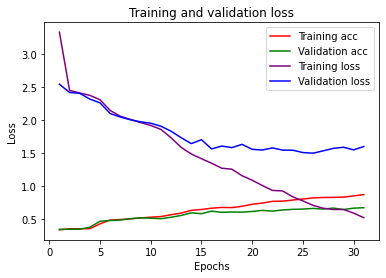

In [156]:
import matplotlib.pyplot as plt 

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 5. 마치며

### 5.1 루브릭
***

|**평가문항**|**상세기준**|
|------------|-------------|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|

### 5.2 느낀점

* 초반에 노드에서 배웠던 내용들을 좀 더 깊게 배우는 느낌이 들어 좋았다.
* 처음 접했을 땐 상당히 어렵게 느껴지던 개념들이었는데, 두번쨰 보는거라고 거부감이 덜해 학습하면서 기분이 묘했다. 물론 여전히 깊게 이해하진 못했다.
* 3가지 버전의 vocab size 로 인해 굉장히 볼륨이 많게 느껴진 프로젝트였다. 불륨 압박으로 제시된 모델 중 몇가지를 생략했다.